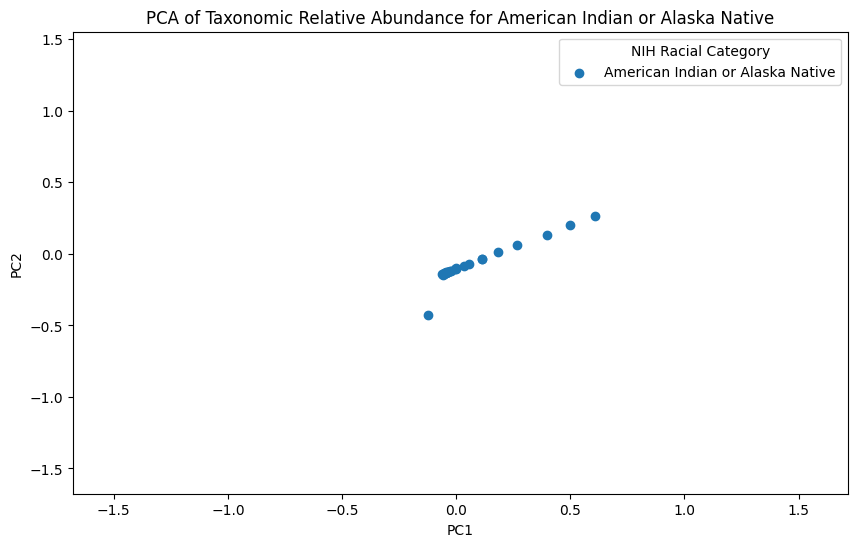

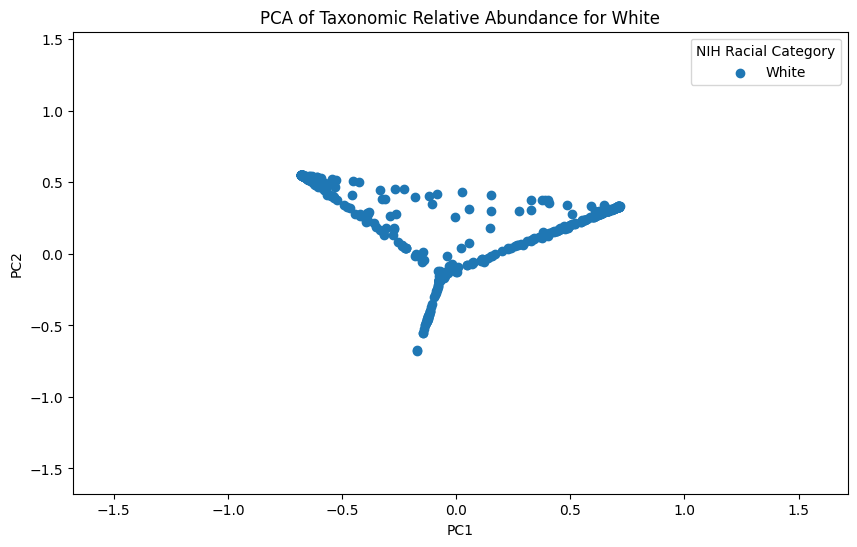

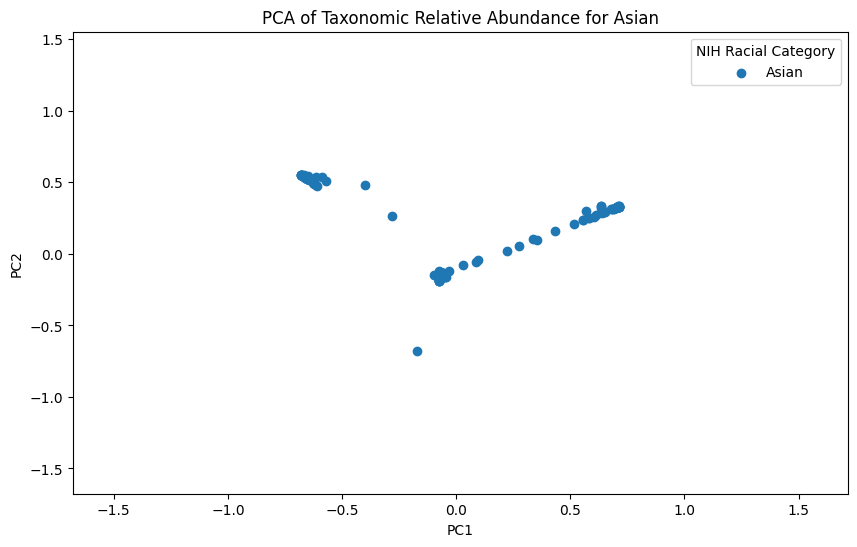

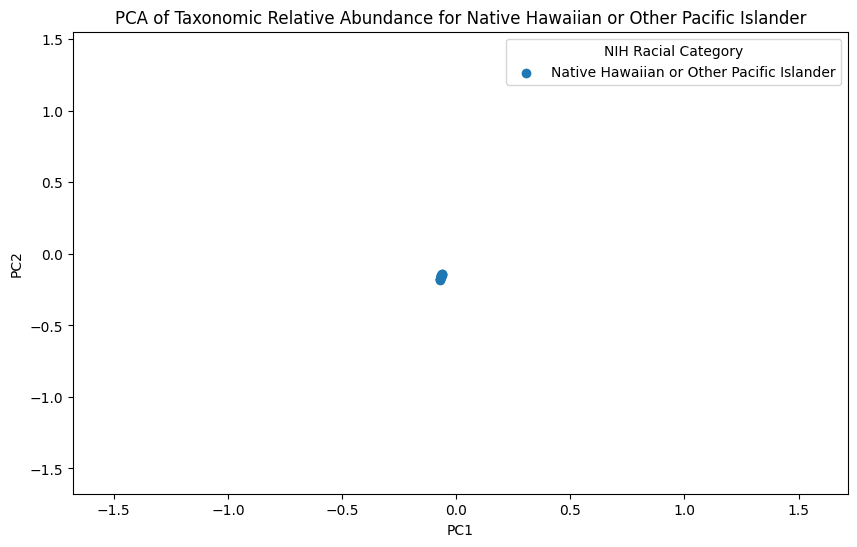

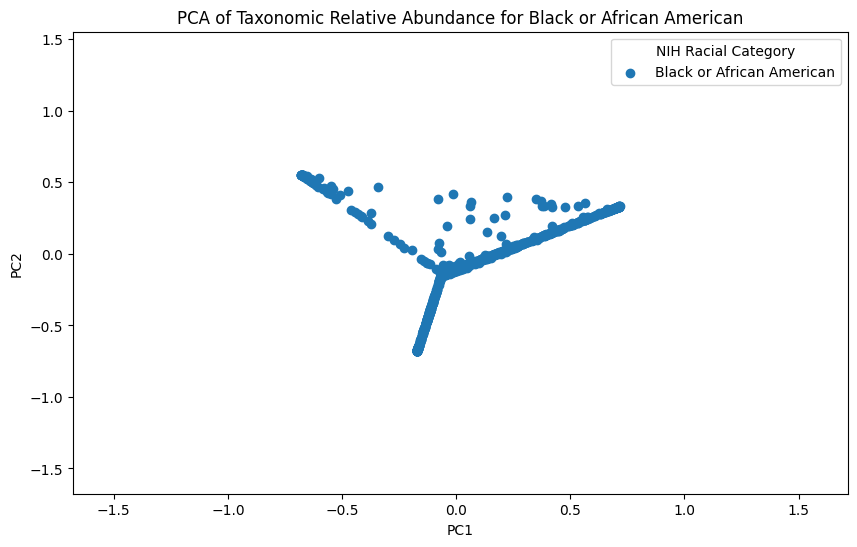

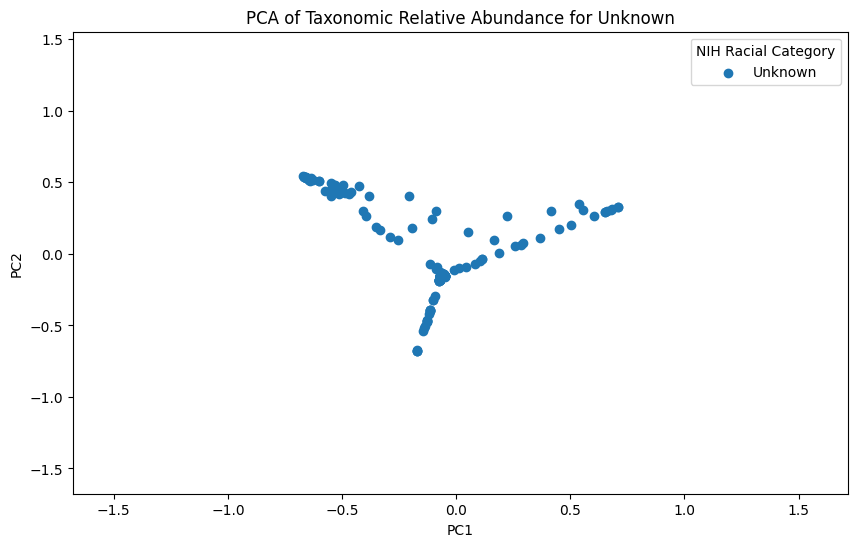

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

metadata = pd.read_csv(r"C:\Users\Emiliano\Desktop\CodigosTesis\Training\Training\metadata\metadata.csv")
rel_abun = pd.read_csv(r"C:\Users\Emiliano\Desktop\CodigosTesis\Training\Training\taxonomy\taxonomy_relabd.species.csv")


rel_abun_etn = pd.merge(metadata[['specimen', 'NIH Racial Category']], rel_abun, on='specimen')

data_pca = rel_abun_etn.drop(columns=['specimen', 'NIH Racial Category'])


pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_pca)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['NIH Racial Category'] = rel_abun_etn['NIH Racial Category']

x_min, x_max = pca_df['PC1'].min() - 1, pca_df['PC1'].max() + 1
y_min, y_max = pca_df['PC2'].min() - 1, pca_df['PC2'].max() + 1


race_categories = pca_df['NIH Racial Category'].unique()

for race in race_categories: 
    race_df = pca_df[pca_df['NIH Racial Category'] == race] 

    plt.figure(figsize=(10, 6))
    plt.scatter(race_df['PC1'], race_df['PC2'], label=race)
    plt.title(f'PCA of Taxonomic Relative Abundance for {race}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.xlim(x_min, x_max)  
    plt.ylim(y_min, y_max)  
    plt.legend(title="NIH Racial Category")
    plt.show()